In [18]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch import optim, nn
from torch.nn import BCEWithLogitsLoss
from matplotlib import pyplot as plt

In [19]:
X = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100], dtype= torch.float32)
y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype= torch.float32)

In [20]:
class LogisticDataloader(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = X.reshape(-1, 1)
        self.y = y.reshape(-1, 1)
    
    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [21]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # since we are planning to use BCEWithLogitsLoss, we do not need the sigmoid activation function
        # the cost function will handle it itself
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)

In [22]:
model = LogisticRegression()
dataset = LogisticDataloader(X=X, y=y)
dataloader = DataLoader(dataset=dataset, batch_size= dataset.__len__(), shuffle= True)
criterion = BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr= 0.001)

In [23]:
loss_list = []
model.train()
for epoch in range(100):
    loss = 0.0
    for input, target in dataloader:
        optimizer.zero_grad()
        output = model(input)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        print(f'parameters - weights = {model.linear.weight.item()}, bias = {model.linear.bias.item()}, loss = {loss.item()}')
        loss = loss.detach().numpy()
        loss_list.append(loss)

parameters - weights = 0.8877543807029724, bias = 0.19692325592041016, loss = 5.205472469329834
parameters - weights = 0.8821213841438293, bias = 0.1963968575000763, loss = 5.173461437225342
parameters - weights = 0.8764886856079102, bias = 0.19587062299251556, loss = 5.141454696655273
parameters - weights = 0.8708562850952148, bias = 0.19534455239772797, loss = 5.1094512939453125
parameters - weights = 0.8652241826057434, bias = 0.1948186457157135, loss = 5.077451705932617
parameters - weights = 0.8595923781394958, bias = 0.19429290294647217, loss = 5.045454978942871
parameters - weights = 0.8539609313011169, bias = 0.19376732409000397, loss = 5.013462543487549
parameters - weights = 0.8483297824859619, bias = 0.1932419240474701, loss = 4.98147439956665
parameters - weights = 0.8426989912986755, bias = 0.19271668791770935, loss = 4.949489116668701
parameters - weights = 0.8370685577392578, bias = 0.19219163060188293, loss = 4.917508602142334
parameters - weights = 0.831438422203064, b

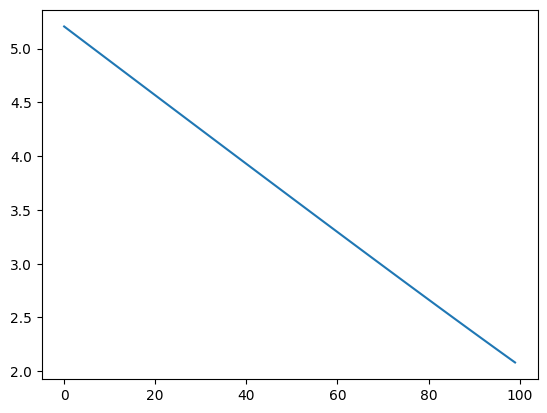

In [24]:
plt.plot(loss_list)
plt.show()